<a href="https://colab.research.google.com/github/ADITEYARAJ/ASSIGNMENT-TBLUX/blob/master/assignment_Aditeya_Raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test_csv.csv to test_csv (1).csv
Saving train_csv.csv to train_csv (1).csv


#Uploading the train_csv and test_csv file to the google colab environment

In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product
from sklearn import metrics
import numpy as np

#importing necessary libraries for forecasting


In [0]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train_csv.csv']))
test =pd.read_csv(io.BytesIO(uploaded['test_csv.csv']))

#Reading the train_csv and test _csv as train and test



In [0]:
train.head(10)

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70
5,5,2019-03-19 00:00:50,302.08
6,6,2019-03-19 00:01:00,152.25
7,7,2019-03-19 00:01:10,41.19
8,8,2019-03-19 00:01:20,34.61
9,9,2019-03-19 00:01:30,205.87


In [0]:
test.head(10)

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00
5,85,2019-03-19 00:14:10
6,86,2019-03-19 00:14:20
7,87,2019-03-19 00:14:30
8,88,2019-03-19 00:14:40
9,89,2019-03-19 00:14:50


#Viewing the first 10 element of train and test data set


Text(0.5, 0, 'id')

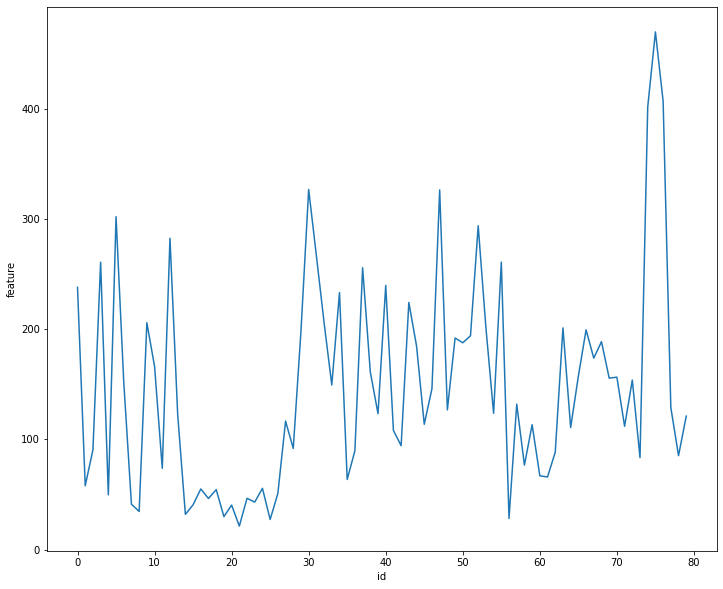

In [0]:
train.feature.plot()
plt.ylabel('feature')
plt.xlabel('id')

#ploting the time plot of  train data 


#Checking stationarity and performing STL decomposition (Seasonal and Trend decomposition using Loess)


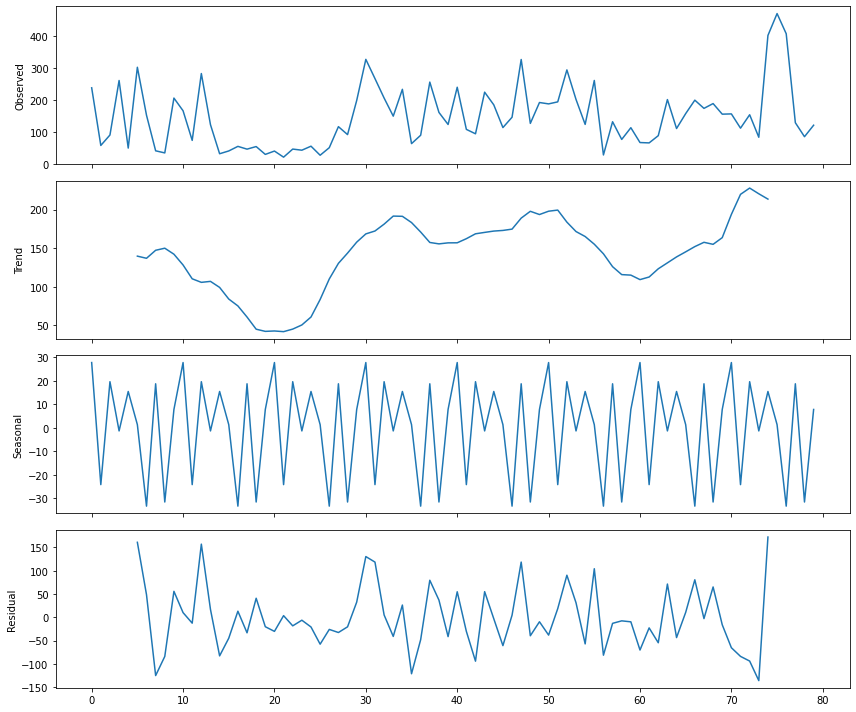

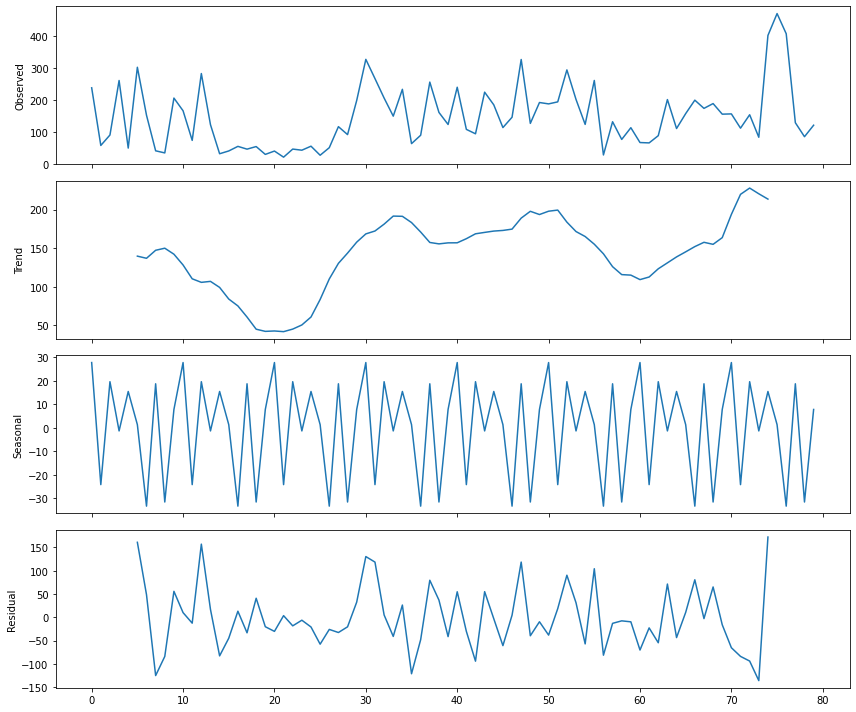

In [0]:
sm.tsa.seasonal_decompose(train['feature'],freq=10).plot()


In [0]:
print("Dickey-Fuller criterion: p=%f" % 
      sm.tsa.stattools.adfuller(train['feature'])[1])


Dickey-Fuller criterion: p=0.000000


#Dickey-Fuller criteriom rejects the Non-stationarity hypothesis is now rejected, and graphs look all right, no trend anymore.


#Model selection
#Let's build ACF and PACF for our time series (seems that there's a bug in PACF, it can't be >1):



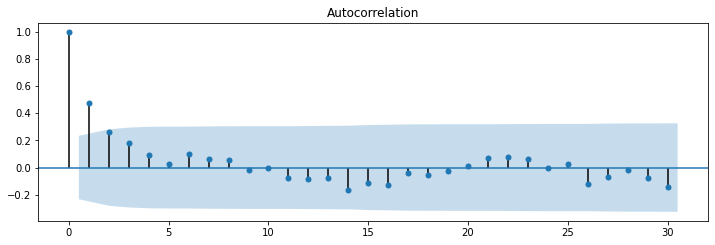

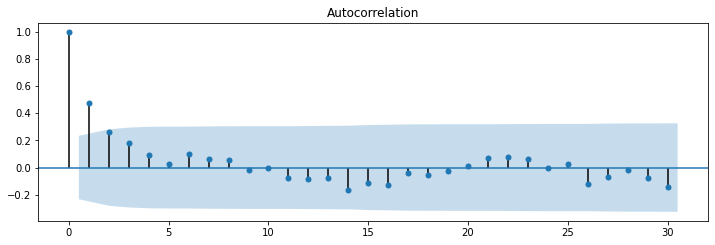

In [0]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train['feature'][10:].values.squeeze(), 
                         lags=30, ax=ax)
#WE SET q=1

#Checking for the Autocorrelation with ACF plot 


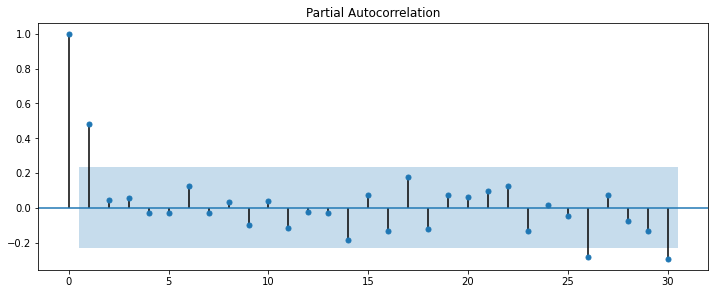

In [0]:
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train['feature'][10:].values.squeeze(), 
                          lags=30, ax=ax);#we set Q=1

#Checking for the Partial Autocorrelation with PACF plot


In [0]:
ps = range(0, 3)
d=1
qs = range(0, 1)
Ps = range(0, 3)
D=1
Qs = range(0, 3)

In [0]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

27

#So we can have 27 combinations off ps,qs,Ps,Qs

In [0]:
%%time
results = []
best_aic = float("inf")

warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except is needed because some parameter combinations are not valid
    try:
        model=sm.tsa.statespace.SARIMAX(train['feature'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, 
                                                        param[3], 10)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    # save best model, it's AIC and params
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

CPU times: user 21.9 s, sys: 15.6 s, total: 37.5 s
Wall time: 19 s


In [0]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters         aic
19  (2, 0, 0, 1)  856.724560
22  (2, 0, 1, 1)  857.897890
20  (2, 0, 0, 2)  858.222792
21  (2, 0, 1, 0)  858.267250
25  (2, 0, 2, 1)  859.139053


#So we see that the 19th combination 0f (2,0,0,1) gives us the best model with leat AIC value

In [0]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            feature   No. Observations:                   80
Model:             SARIMAX(2, 1, 0)x(0, 1, 1, 10)   Log Likelihood                -424.362
Date:                            Fri, 12 Jun 2020   AIC                            856.725
Time:                                    05:54:10   BIC                            865.661
Sample:                                         0   HQIC                           860.270
                                             - 80                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4318      0.109     -3.953      0.000      -0.646      -0.218
ar.L2         -0.2943      0.120   

#Checking the summary of the model


#Its residuals:

Text(0, 0.5, 'Residuals')

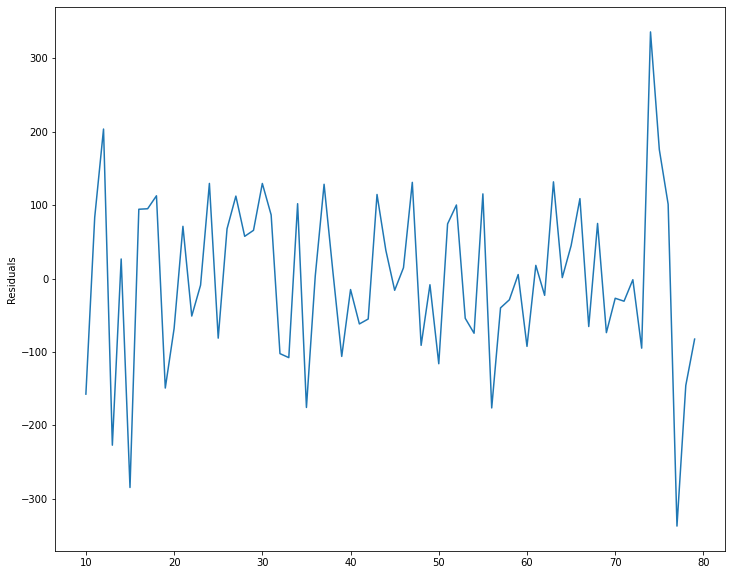

In [0]:
best_model.resid[10:].plot()
plt.ylabel(u'Residuals')

Student's criterion: p=0.836909
Dickey-Fuller criterion: p=0.000018


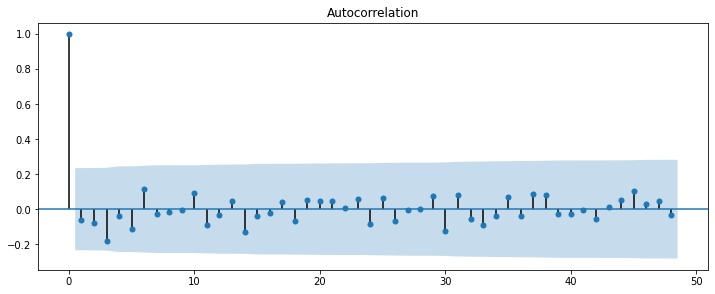

In [0]:
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[10:].values.squeeze(), lags=48, ax=ax)

print("Student's criterion: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller criterion: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[10:])[1])

#Residuals are not biased (confirmed by the Student's criterion), are stationary (confirmed by the Dickey-Fuller criterion) and not auto-correlated (confirmed by the Ljung-Box criterion and correlogram). Let's see how well the model fits data:


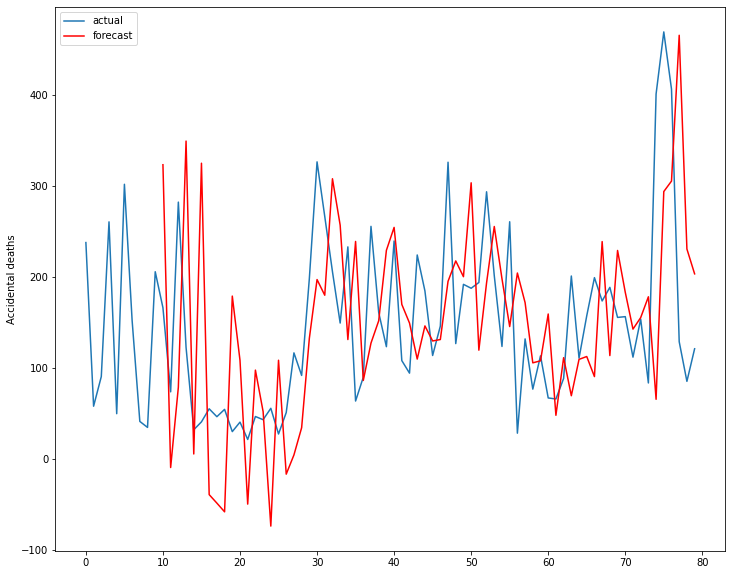

In [0]:
train['model'] = best_model.fittedvalues
train['feature'].plot(label='actual')
train['model'][10:].plot(color='r', label='forecast')
plt.ylabel('Accidental deaths')
plt.legend();

 #The RMSE score:
 


```
# This is formatted as code
```



In [0]:
print(np.sqrt(metrics.mean_squared_error(train['feature'],train['model'])))

123.40699031149532


#Forecast

In [0]:
test['forecast1'] = best_model.predict(start=test.index[0],end=test.index[-1])
test

,id,time,forecast1
0,80,2019-03-19 00:13:20,0.000000
1,81,2019-03-19 00:13:30,237.120693
2,82,2019-03-19 00:13:40,58.824186
3,83,2019-03-19 00:13:50,91.272877
4,84,2019-03-19 00:14:00,258.743958
5,85,2019-03-19 00:14:10,50.856463
6,86,2019-03-19 00:14:20,301.667535
7,87,2019-03-19 00:14:30,151.341943
8,88,2019-03-19 00:14:40,43.856740
9,89,2019-03-19 00:14:50,34.632990


#These are the forecast on the test data  

#Ploting the forecasted value of test data and the actual value of the training data


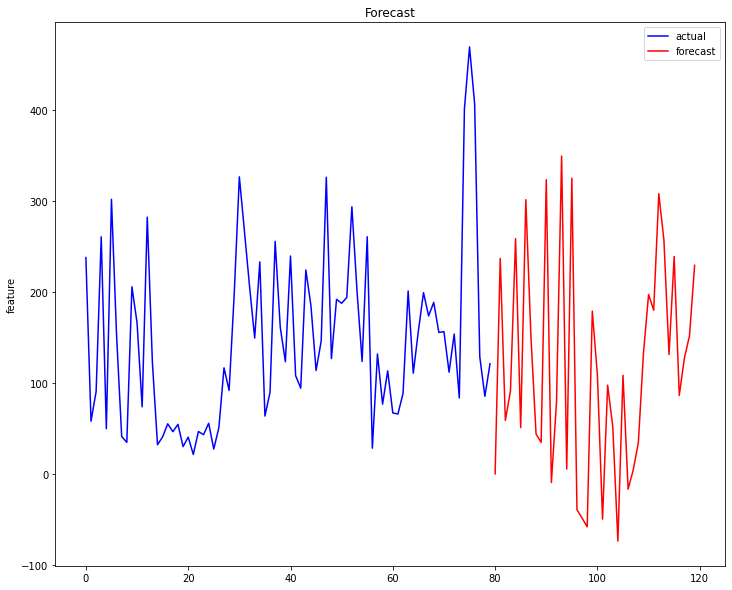

In [0]:
plt.plot(train['id'],train['feature'],color='blue',label='actual')
plt.plot(test['id'],test['forecast1'],color='r', label='forecast')
plt.ylabel('feature')
plt.title('Forecast')
plt.legend();